#### __Import Libraries__

In [1023]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from torch import nn, optim
import seaborn as sns

#### __Load the dataset__

In [1024]:
wine = load_wine()
X = wine.data
y = wine.target

#### __Standardize the features__

In [1025]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(13, 32)
        self.fc2 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = NN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### __Train the model__

In [1026]:
epochs = 1_000
loss_lst = list()
pred_lst = list()

for epoch in range(epochs):
    # Learning
    optimizer.zero_grad()
    out = model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()

    # Testing
    predictions = model(X_test)
    acc = criterion(predictions, y_test)

    # Scoring
    if (epoch+1) % 10 == 0 and epoch < 100:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    elif (epoch+1) % 100 == 0 and epoch < 1000:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    elif (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.6f}'.format(epoch+1, epochs, loss.item()))

    class_correct = list(0. for i in range(3))
    class_total = list(0. for i in range(3))
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == y_test).squeeze()
    for i in range(len(y_test)):
        label = y_test[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

    loss_lst.append(loss.item())
    pred_lst.append(sum(class_correct)/sum(class_total))

Epoch [10/1000], Loss: 0.8684
Epoch [20/1000], Loss: 0.7398
Epoch [30/1000], Loss: 0.6297
Epoch [40/1000], Loss: 0.5356
Epoch [50/1000], Loss: 0.4557
Epoch [60/1000], Loss: 0.3887
Epoch [70/1000], Loss: 0.3333
Epoch [80/1000], Loss: 0.2879
Epoch [90/1000], Loss: 0.2507
Epoch [100/1000], Loss: 0.2201
Epoch [200/1000], Loss: 0.0859
Epoch [300/1000], Loss: 0.0474
Epoch [400/1000], Loss: 0.0301
Epoch [500/1000], Loss: 0.0207
Epoch [600/1000], Loss: 0.0149
Epoch [700/1000], Loss: 0.0112
Epoch [800/1000], Loss: 0.0086
Epoch [900/1000], Loss: 0.0068
Epoch [1000/1000], Loss: 0.0055


#### __Graphic Representation__

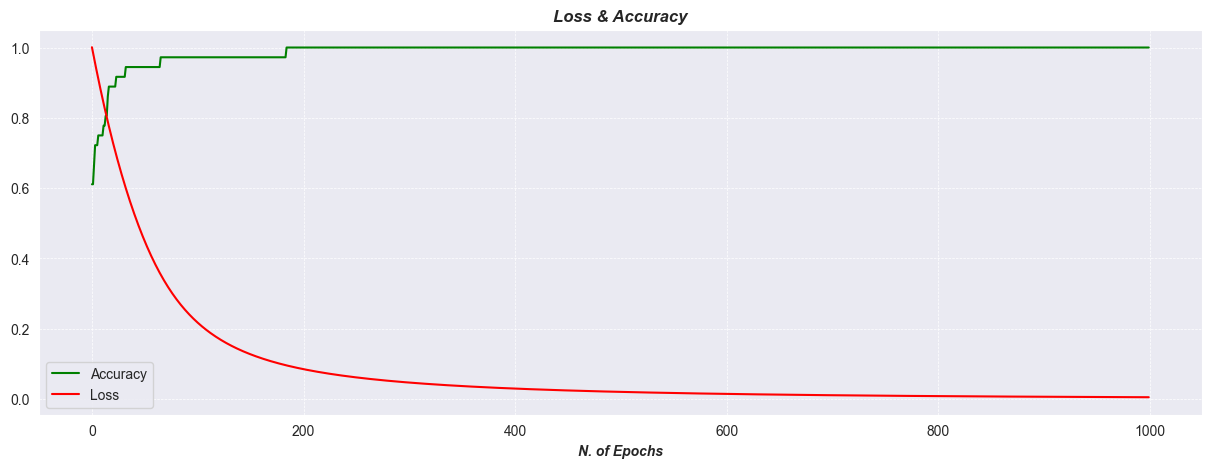

In [1041]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs.plot(pred_lst, label='Accuracy', color='green')
loss_lst_plot, = axs.plot(loss_lst, label='Loss', color='red')
axs.grid(linestyle='--', linewidth=0.5)
axs.set_title('Loss & Accuracy', fontstyle='italic', fontweight='bold')
axs.set_xlabel('N. of Epochs', fontstyle='italic', fontweight='bold')
axs.legend(handles=[accuracy_plot, loss_lst_plot])
pass

#### __Test the model__

In [1028]:
model.eval()
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == y_test).squeeze()
    for i in range(len(y_test)):
        label = y_test[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

for i in range(3):
    print('Accuracy of class %d : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

overall_correct = sum(class_correct)
overall_total = sum(class_total)

print('Overall accuracy: %.2f %%' % (100 * overall_correct / overall_total))

Accuracy of class 0 : 100 %
Accuracy of class 1 : 100 %
Accuracy of class 2 : 100 %
Overall accuracy: 100.00 %


#### __Confusion Matrix__

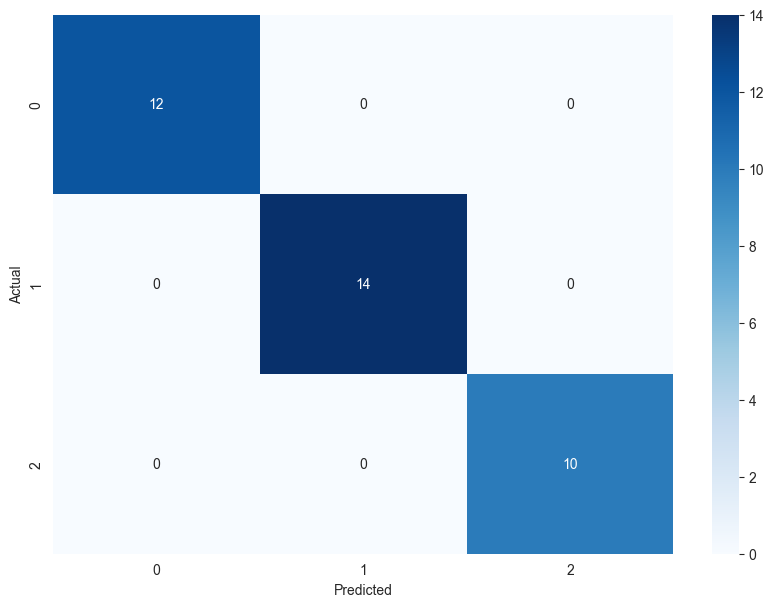

In [1029]:
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()